In [89]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('Planner.db')
cursor = conn.cursor()

In [19]:
query = "SELECT * FROM Planner"
cursor.execute(query)
resultados=cursor.fetchall()

for row in resultados:
    print(row)

(1, '2024-06-03', 'Segunda', "'python', 'python', 'algebra linear', 'estrutura de dados', 'estrutura de dados'", 6)
(2, '2024-06-04', 'terça', "'python'", 1)
(3, '2024-06-05', 'quarta', "'python', 'algebra linear', 'python','matematica','estrutura de dados','inglês'", 4)
(4, '2024-06-05', 'quinta', "'python', 'algebra linear', 'inglês'", 6)
(5, '2024-06-06', 'sexta', "'python', 'ingles', 'algebra linear', 'python', 'estrutura de dados','ingles'", 6)
(10, '2024-06-10', 'segunda', "'python', 'ingles', 'provas', 'estrutura de dados','algebra linear', 'python'", 6)
(11, '2024-06-11', 'terça', "'python', 'ingles', 'python', 'estrutura de dados', 'python'", 5)
(12, '2024-06-12', 'quarta', "'python', 'python',", 2)
(13, '2024-06-13', 'quinta', "'python', 'python',", 2)


In [72]:
query = "SELECT * FROM Planner"
df = pd.read_sql_query(query, conn)
print(df)

   id        dias dia_semana  \
0   1  2024-06-03    Segunda   
1   2  2024-06-04      terça   
2   3  2024-06-05     quarta   
3   4  2024-06-06     quinta   
4   5  2024-06-07      sexta   
5  10  2024-06-10    segunda   
6  11  2024-06-11      terça   
7  12  2024-06-12     quarta   
8  13  2024-06-13     quinta   
9  14  2024-06-14      sexta   

                                             materia  horas  
0  'python', 'python', 'algebra linear', 'estrutu...      6  
1                                           'python'      1  
2  'python', 'algebra linear', 'python','matemati...      4  
3               'python', 'algebra linear', 'inglês'      6  
4  'python', 'ingles', 'algebra linear', 'python'...      6  
5  'python', 'ingles', 'provas', 'estrutura de da...      6  
6  'python', 'ingles', 'python', 'estrutura de da...      5  
7                                'python', 'python',      2  
8                                'python', 'python',      2  
9  'python', 'python', 'pyt

In [9]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import matplotlib.pyplot as plt
df['dias'] = pd.to_datetime(df['dias'])

In [15]:
query = "SELECT materia FROM Planner"
df_materia = (query, conn)
print(df_materia)

('SELECT materia FROM Planner', <sqlite3.Connection object at 0x0000024E1E515C60>)


In [22]:
conn = sqlite3.connect('Planner.db')
df = pd.read_sql_query("SELECT * FROM Planner", conn)

In [63]:
dias_especificos = (1, 2, 3, 4, 5)
query = "SELECT id, dia_semana, horas FROM Planner WHERE id IN (?, ?, ?, ?, ?)"
df = pd.read_sql_query(query, conn, params=dias_especificos)

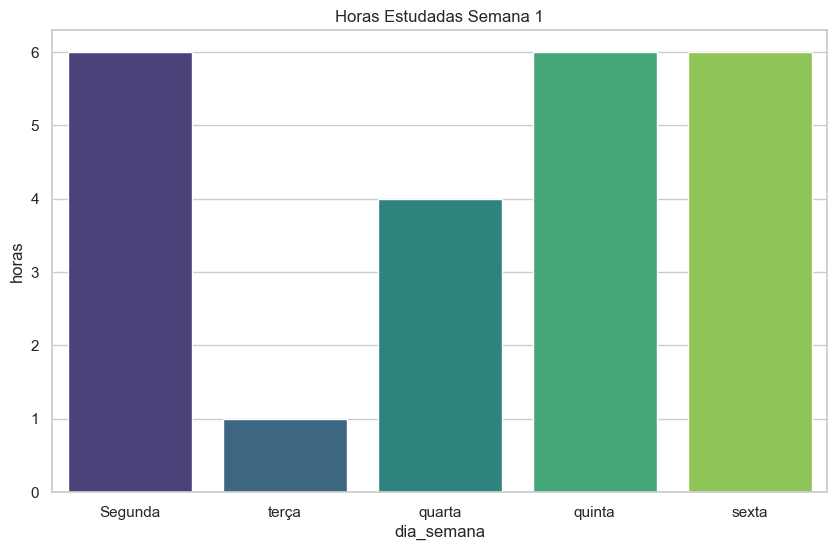

In [64]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='dia_semana', y='horas', palette="viridis")

plt.title('Horas Estudadas Semana 1')
plt.xlabel('dia_semana')
plt.ylabel('horas')

plt.show()

In [58]:
conn = sqlite3.connect('Planner.db')
df = pd.read_sql_query("SELECT materia FROM Planner", conn)

In [54]:
id_min = 0
id_max = 5
cursor.execute("SELECT SUM(horas) FROM Planner WHERE id BETWEEN ? AND ?", (id_min, id_max))
result = cursor.fetchone()

totalh_semana1 = result[0] if result[0] is not None else 0

In [68]:
ids_semana1 = (1, 2, 3, 4, 5) 
query = "SELECT id, materia, horas FROM Planner WHERE id IN (?, ?, ?, ?, ?)"
df_semana1 = pd.read_sql_query(query, conn, params=ids_semana1)

cursor.execute("SELECT SUM(horas) FROM Planner WHERE id IN (?, ?, ?, ?, ?)", ids_semana1)
result = cursor.fetchone()
total_horas1 = result[0] if result[0] is not None else 0

print(f"Total de horas estudadas para os IDs específicos: {total_horas1}")

conjuntos1 = ['python', 'algebra linear', 'ingles', 'estrutura de dados', 'matematica']

contagens1 = {conjunto1: 0 for conjunto1 in conjuntos1}

for materia in df['materia']:
    for conjunto1 in conjuntos1:
        if conjunto1 in materia:
            contagens1[conjunto1] += 1

print("Contagens:", contagens1)

total_semana1 = sum(contagens1.values())

porcentagens1 = {conjunto1: (contagem1 / total_semana1) * 100 for conjunto1, contagem1 in contagens1.items() if total_semana1 > 0}

print("Porcentagens:", porcentagens1)
conn.close()

Total de horas estudadas para os IDs específicos: 23
Contagens: {'python': 9, 'algebra linear': 5, 'ingles': 3, 'estrutura de dados': 5, 'matematica': 1}
Porcentagens: {'python': 39.130434782608695, 'algebra linear': 21.73913043478261, 'ingles': 13.043478260869565, 'estrutura de dados': 21.73913043478261, 'matematica': 4.3478260869565215}


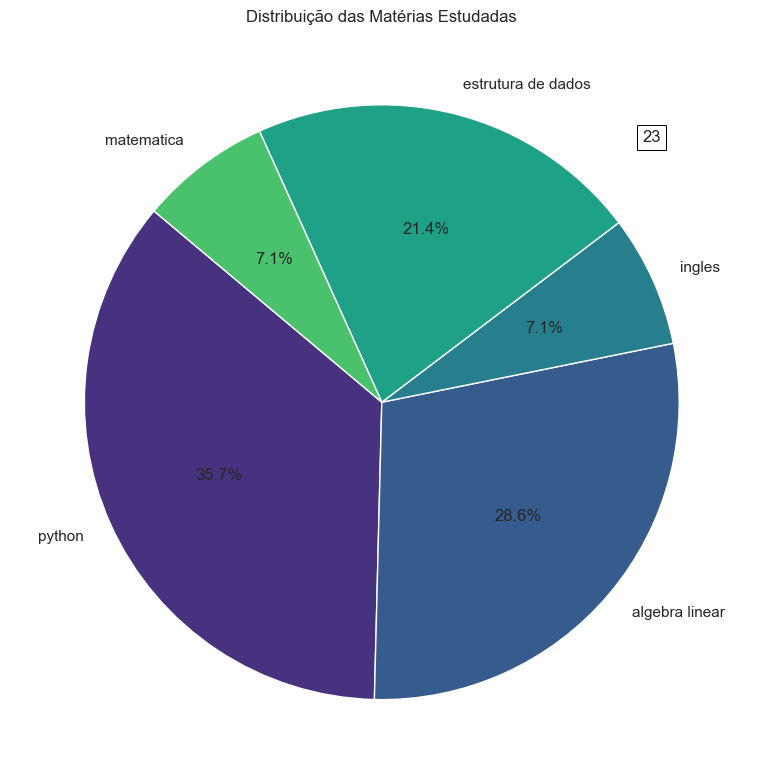

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = list(porcentagens1.keys())
sizes = list(porcentagens1.values())

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))

plt.title('Distribuição das Matérias Estudadas')

totalhoras = totalh_semana1
bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="black", lw=0.72)
ax.annotate(totalhoras , xy=(0.85, 0.85), xycoords='axes fraction', fontsize=12, bbox=bbox_props)

plt.tight_layout()
plt.show()

In [81]:
ids_especificos = (10, 11, 12, 13, 14) 
query = "SELECT * FROM Planner WHERE id IN (?, ?, ?, ?, ?)"
df = pd.read_sql_query(query, conn, params=ids_especificos)
print(df)

   id        dias dia_semana  \
0  10  2024-06-10    segunda   
1  11  2024-06-11      terça   
2  12  2024-06-12     quarta   
3  13  2024-06-13     quinta   
4  14  2024-06-14      sexta   

                                             materia  horas  
0  'python', 'ingles', 'provas', 'estrutura de da...      6  
1  'python', 'ingles', 'python', 'estrutura de da...      5  
2                                'python', 'python',      2  
3                                'python', 'python',      2  
4  'python', 'python', 'python', 'python', 'estru...      7  


In [73]:
conn = sqlite3.connect('Planner.db')
df = pd.read_sql_query("SELECT materia FROM Planner", conn)

In [90]:
id_min = 10
id_max = 14
cursor.execute("SELECT SUM(horas) FROM Planner WHERE id BETWEEN ? AND ?", (id_min, id_max))
result = cursor.fetchone()

totalh_semana2 = result[0] if result[0] is not None else 0

In [86]:
ids_semana2 = (10, 11, 12, 13, 14) 
query = "SELECT id, materia, horas FROM Planner WHERE id IN (?, ?, ?, ?, ?)"
df_semana2 = pd.read_sql_query(query, conn, params=ids_semana2)

cursor.execute("SELECT SUM(horas) FROM Planner WHERE id IN (?, ?, ?, ?, ?)", ids_semana2)
result = cursor.fetchone()
total_horas2 = result[0] if result[0] is not None else 0

print(f"Total de horas estudadas para os IDs específicos: {total_horas2}")

conjuntos2 = ['python', 'algebra linear', 'ingles', 'estrutura de dados', 'provas']

contagens2 = {conjunto2: 0 for conjunto2 in conjuntos2}

for materia in df['materia']:
    for conjunto2 in conjuntos2:
        if conjunto2 in materia:
            contagens2[conjunto2] += 1

print("Contagens:", contagens2)

total_semana2 = sum(contagens2.values())

porcentagens2 = {conjunto2: (contagem2 / total_semana2) * 100 for conjunto2, contagem2 in contagens2.items() if total_semana2 > 0}

print("Porcentagens:", porcentagens2)
conn.close()

Total de horas estudadas para os IDs específicos: 22
Contagens: {'python': 5, 'algebra linear': 2, 'ingles': 3, 'estrutura de dados': 3, 'provas': 1}
Porcentagens: {'python': 35.714285714285715, 'algebra linear': 14.285714285714285, 'ingles': 21.428571428571427, 'estrutura de dados': 21.428571428571427, 'provas': 7.142857142857142}


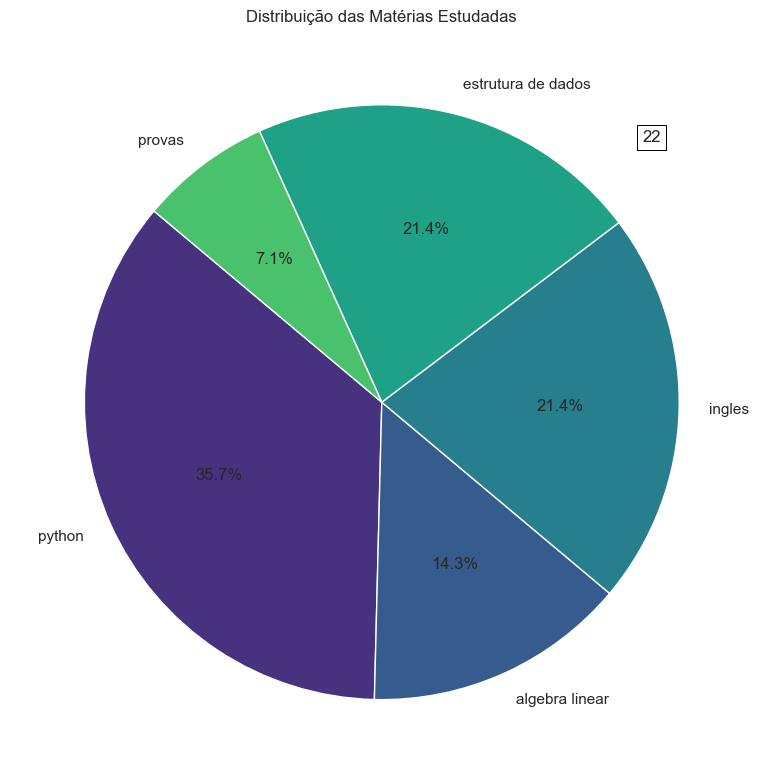

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = list(porcentagens2.keys())
sizes = list(porcentagens2.values())

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))

plt.title('Distribuição das Matérias Estudadas')

totalhoras = totalh_semana2
bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="black", lw=0.72)
ax.annotate(totalhoras , xy=(0.85, 0.85), xycoords='axes fraction', fontsize=12, bbox=bbox_props)

plt.tight_layout()
plt.show()

In [62]:
conn.close()